# Preparation, Cleaning & EDA of the ON Colleges Enrolment by Status worksheet

## Imports & Setup

In [123]:
# open the excel file on 22-23 Stats sheet as a pandas dataframe
# imports

import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# load and read the Status sheet from the workbook
status_df = pd.read_excel('/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/cleaning_copy_excel/on_college_2012-/2012-2022 college_enrolment_headcount.xlsx', sheet_name='Status')

In [125]:
status_df

,College Name,Fiscal Year,Status In Canada Description,Headcount Full-Time Fall,Unnamed: 4
0,Algonquin College,2012-2013,Aboriginal ancestry (where self-identified),279,NaN
1,Algonquin College,2012-2013,Attending an off-shore school,0,NaN
2,Algonquin College,2012-2013,Canadian citizen,14239,NaN
3,Algonquin College,2012-2013,Convention refugee (protected person),13,NaN
4,Algonquin College,2012-2013,In Canada on authority of another visa (includ...,34,NaN
...,...,...,...,...,...
2010,St. Lawrence College,2022-2023,In Canada on authority of another visa (includ...,*,NaN
2011,St. Lawrence College,2022-2023,Other,*,NaN
2012,St. Lawrence College,2022-2023,"Permanent resident, formerly called landed imm...",165,NaN
2013,St. Lawrence College,2022-2023,Student permit/ Student visa: a permit obtaine...,6939,NaN


In [27]:
status_df.shape

(2015, 5)

Remove the Unnamed: 4 column, this was calculations in the Excel sheet manually by me.

In [126]:
status_df.drop(['Unnamed: 4'], axis=1, inplace=True)

In [127]:
status_df

,College Name,Fiscal Year,Status In Canada Description,Headcount Full-Time Fall
0,Algonquin College,2012-2013,Aboriginal ancestry (where self-identified),279
1,Algonquin College,2012-2013,Attending an off-shore school,0
2,Algonquin College,2012-2013,Canadian citizen,14239
3,Algonquin College,2012-2013,Convention refugee (protected person),13
4,Algonquin College,2012-2013,In Canada on authority of another visa (includ...,34
...,...,...,...,...
2010,St. Lawrence College,2022-2023,In Canada on authority of another visa (includ...,*
2011,St. Lawrence College,2022-2023,Other,*
2012,St. Lawrence College,2022-2023,"Permanent resident, formerly called landed imm...",165
2013,St. Lawrence College,2022-2023,Student permit/ Student visa: a permit obtaine...,6939


In [128]:
# Remove the '20' prefix from the fiscal year entries
status_df['Fiscal Year'] = status_df['Fiscal Year'].apply(lambda x: f"{x[2:4]}-{x[7:]}") # this is a lambda function that takes the third and fourth characters and the last two characters of the string

# Display the updated DataFrame to verify the change
print(status_df[['Fiscal Year']].head())

  Fiscal Year
0       12-13
1       12-13
2       12-13
3       12-13
4       12-13


**Remember that any instances of between 0-9 in Headcount have * in them from the original MCU Data. We will replace * with 5 as an estimate**

In [129]:
# replace instances of * in Headcount with 5
status_df['Headcount Full-Time Fall'] = status_df['Headcount Full-Time Fall'].replace('*', 5)

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_80749/3810269543.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  status_df['Headcount Full-Time Fall'] = status_df['Headcount Full-Time Fall'].replace('*', 5)


In [131]:
status_df.shape

(2015, 4)

### Add a TOTAL Full-Time Enrolment figure for each school in each year, so we can build a % share of the credential in the student body

In [132]:
# group the data by each college, every year, and find the total head count
status_df.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].sum()

College Name          Fiscal Year
Algonquin College     12-13          16068
                      13-14          16844
                      14-15          17025
                      15-16          17435
                      16-17          17385
                                     ...  
St. Lawrence College  18-19           8792
                      19-20           9014
                      20-21           9229
                      21-22           9039
                      22-23          11243
Name: Headcount Full-Time Fall, Length: 264, dtype: int64

In [133]:
# add a column that displays the total headcount in that year for each college
status_df["School's Total Headcount This Year"] = status_df.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].transform('sum')

In [134]:
status_df

,College Name,Fiscal Year,Status In Canada Description,Headcount Full-Time Fall,School's Total Headcount This Year
0,Algonquin College,12-13,Aboriginal ancestry (where self-identified),279,16068
1,Algonquin College,12-13,Attending an off-shore school,0,16068
2,Algonquin College,12-13,Canadian citizen,14239,16068
3,Algonquin College,12-13,Convention refugee (protected person),13,16068
4,Algonquin College,12-13,In Canada on authority of another visa (includ...,34,16068
...,...,...,...,...,...
2010,St. Lawrence College,22-23,In Canada on authority of another visa (includ...,5,11243
2011,St. Lawrence College,22-23,Other,5,11243
2012,St. Lawrence College,22-23,"Permanent resident, formerly called landed imm...",165,11243
2013,St. Lawrence College,22-23,Student permit/ Student visa: a permit obtaine...,6939,11243


I want to clean up the lengthy Status Descriptions so they are cleaner to read in data viz later.

In [135]:
# Shorten the Aboriginal Ancestry (where self-identified) column name to Aboriginal
status_df.loc[
    (status_df['Status In Canada Description'] == 'Aboriginal ancestry (where self-identified)'), 
    'Status In Canada Description'] = 'Aboriginal'

In [136]:
# shorten Convention refugee (protected person) to Refugee/protected
status_df.loc[
    (status_df['Status In Canada Description'] == 'Convention refugee (protected person)') | 
    (status_df['Status In Canada Description'] == 'Refugee status'), 
    'Status In Canada Description'] = 'Refugee/Protected'

# shorten Permanent resident, formerly called landed immigrant to Permanent Resident
status_df.loc[
    (status_df['Status In Canada Description'] == 'Permanent resident, formerly called landed immigrant'),
    'Status In Canada Description'] = 'Permanent Resident'

In [137]:
status_df['Status In Canada Description'].unique()

array(['Aboriginal', 'Attending an off-shore school', 'Canadian citizen',
       'Refugee/Protected',
       'In Canada on authority of another visa (including students who are in Canada on diplomatic, trade or other missions)',
       'Other', 'Permanent Resident',
       'Student permit/ Student visa: a permit obtained by a student to enter Canada for the sole purpose of attending an educational postsecondary institution',
       'Unknown'], dtype=object)

In [138]:
# shorten Canadian Citizen to Canadian
status_df.loc[
    (status_df['Status In Canada Description'] == 'Canadian citizen'),
    'Status In Canada Description'] = 'Canadian'

# shorten 'Student permit/ Student visa: a permit obtained by a student to enter Canada for the sole purpose of attending an educational postsecondary institution' to 'International Student'
status_df.loc[
    (status_df['Status In Canada Description'] == 'Student permit/ Student visa: a permit obtained by a student to enter Canada for the sole purpose of attending an educational postsecondary institution'),
    'Status In Canada Description'] = 'International Student'

# 'In Canada on authority of another visa (including students who are in Canada on diplomatic, trade or other missions)' # shorten to 'Other Visa'
status_df.loc[
    (status_df['Status In Canada Description'] == 'In Canada on authority of another visa (including students who are in Canada on diplomatic, trade or other missions)') |
    (status_df['Status In Canada Description'] == 'Other'),
    'Status In Canada Description'] = 'Other Visa'

# shorten 'Attending an off-shore school' to 'Off-shore'
status_df.loc[
    (status_df['Status In Canada Description'] == 'Attending an off-shore school'),
    'Status In Canada Description'] = 'Off-shore'

In [139]:
status_df['Status In Canada Description'].unique()

array(['Aboriginal', 'Off-shore', 'Canadian', 'Refugee/Protected',
       'Other Visa', 'Permanent Resident', 'International Student',
       'Unknown'], dtype=object)

I will now add **share of the student headcount** which each status has.

In [140]:
# New column which divides Headcount Full-Time Fall by School's Total Headcount This Year
status_df['Status Share of Headcount'] = round((status_df['Headcount Full-Time Fall'] / status_df["School's Total Headcount This Year"]) * 100, 2)

In [141]:
status_df

,College Name,Fiscal Year,Status In Canada Description,Headcount Full-Time Fall,School's Total Headcount This Year,Status Share of Headcount
0,Algonquin College,12-13,Aboriginal,279,16068,1.74
1,Algonquin College,12-13,Off-shore,0,16068,0.00
2,Algonquin College,12-13,Canadian,14239,16068,88.62
3,Algonquin College,12-13,Refugee/Protected,13,16068,0.08
4,Algonquin College,12-13,Other Visa,34,16068,0.21
...,...,...,...,...,...,...
2010,St. Lawrence College,22-23,Other Visa,5,11243,0.04
2011,St. Lawrence College,22-23,Other Visa,5,11243,0.04
2012,St. Lawrence College,22-23,Permanent Resident,165,11243,1.47
2013,St. Lawrence College,22-23,International Student,6939,11243,61.72


## Pivoting the Dataframe - each record will be the College in a given Year and columns will be the credential's share of the student headcount

In [142]:
# pivot the table to get each Credential's headcount share as columns

status_df_pivot = status_df.pivot_table(
    index=['College Name', 'Fiscal Year', "School's Total Headcount This Year"], # setting the index specifies which columns to keep as is
    columns = 'Status In Canada Description', # this is the record data we will transform into column data
    values = 'Status Share of Headcount' # this is the data we will use to fill the new columns of Status In Canada Description, once we've renamed to Share of the Headcount
).reset_index()

In [143]:
status_df_pivot

Status In Canada Description,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal,Canadian,International Student,Off-shore,Other Visa,Permanent Resident,Refugee/Protected,Unknown
0,Algonquin College,12-13,16068,1.74,88.62,4.90,0.0,0.200,4.10,0.120,0.00
1,Algonquin College,13-14,16844,1.72,87.61,5.52,0.0,0.230,4.47,0.110,NaN
2,Algonquin College,14-15,17025,1.89,86.08,6.73,0.0,0.235,4.66,0.085,NaN
3,Algonquin College,15-16,17435,2.07,85.37,7.44,0.0,0.200,4.52,0.095,NaN
4,Algonquin College,16-17,17385,1.58,83.99,9.11,NaN,0.225,4.61,0.140,NaN
...,...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8792,5.22,57.55,34.53,NaN,0.030,1.80,NaN,0.84
260,St. Lawrence College,19-20,9014,4.69,53.38,39.52,NaN,0.060,1.83,NaN,0.52
261,St. Lawrence College,20-21,9229,3.65,47.09,46.95,NaN,0.050,1.67,NaN,0.59
262,St. Lawrence College,21-22,9039,3.43,45.77,48.80,NaN,0.060,1.53,NaN,0.37


In [144]:
# Rename the columns
status_df_pivot.rename(columns={
    'Aboriginal': 'Aboriginal %',
    'Canadian': 'Canadian %',
    'International Student': 'International %',
    'Off-shore': 'Offshore %',
    'Other Visa': 'Other visa %',
    'Permanent Resident': 'Perm. Resident %',
    'Refugee/Protected': 'Refugee/Protected %',
    'Unknown': 'Unknown %'
}, inplace=True)


In [145]:
# remove the column name Gender Description
status_df_pivot.columns.name = None

In [146]:
# overwrite the df with the new pivoted version
status_df = status_df_pivot

In [147]:
status_df

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Offshore %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
0,Algonquin College,12-13,16068,1.74,88.62,4.90,0.0,0.200,4.10,0.120,0.00
1,Algonquin College,13-14,16844,1.72,87.61,5.52,0.0,0.230,4.47,0.110,NaN
2,Algonquin College,14-15,17025,1.89,86.08,6.73,0.0,0.235,4.66,0.085,NaN
3,Algonquin College,15-16,17435,2.07,85.37,7.44,0.0,0.200,4.52,0.095,NaN
4,Algonquin College,16-17,17385,1.58,83.99,9.11,NaN,0.225,4.61,0.140,NaN
...,...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8792,5.22,57.55,34.53,NaN,0.030,1.80,NaN,0.84
260,St. Lawrence College,19-20,9014,4.69,53.38,39.52,NaN,0.060,1.83,NaN,0.52
261,St. Lawrence College,20-21,9229,3.65,47.09,46.95,NaN,0.050,1.67,NaN,0.59
262,St. Lawrence College,21-22,9039,3.43,45.77,48.80,NaN,0.060,1.53,NaN,0.37


### create an average of each College for these statistics in every year

### Dealing with Nulls

In [148]:
status_df.isna().sum()

College Name                            0
Fiscal Year                             0
School's Total Headcount This Year      0
Aboriginal %                           31
Canadian %                              0
International %                         1
Offshore %                            166
Other visa %                           42
Perm. Resident %                       11
Refugee/Protected %                    70
Unknown %                              56
dtype: int64

Thoughts on above:

- I am comfortable filling NA with null here, with the exception of the one international as I saw Loyalist in excel did not record International in 22-23 but did have a significant number in Other, far far more than any other Other value in the entire dataset.

In [149]:
# find the record where International % is NaN
status_df[status_df['International %'].isna()]

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Offshore %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
164,Loyalist College,22-23,6859,0.07,23.98,NaN,NaN,37.555,0.76,0.035,NaN


In [151]:
# check Loyalist College in Fiscal Year 21-22
status_df[status_df['College Name'] == 'Loyalist College']

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Offshore %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
154,Loyalist College,12-13,2796,2.40,93.85,2.47,0.18,0.090,0.93,NaN,NaN
155,Loyalist College,13-14,2720,2.24,94.74,1.25,NaN,0.310,1.14,NaN,NaN
156,Loyalist College,14-15,2791,1.79,94.12,1.83,NaN,1.000,1.25,NaN,0.0
157,Loyalist College,15-16,2781,1.80,92.99,2.37,NaN,0.825,1.19,NaN,0.0
158,Loyalist College,16-17,2687,0.89,90.51,4.47,0.19,1.380,1.19,NaN,0.0
159,Loyalist College,17-18,2817,0.18,86.12,10.37,0.18,1.950,1.21,0.000,0.0
160,Loyalist College,18-19,3194,0.34,72.01,24.17,0.16,1.970,1.19,0.160,0.0
161,Loyalist College,19-20,3284,0.15,61.57,14.40,NaN,22.660,1.07,0.150,NaN
162,Loyalist College,20-21,3291,0.15,55.27,1.22,NaN,42.210,1.00,0.075,NaN
163,Loyalist College,21-22,5482,0.00,30.30,0.09,NaN,68.750,0.77,0.045,NaN


Looking above, I think it is **extremely likely that Loyalist, in 2019-2020 began changing their data collection where International Students began being stored in the Other category.** 

There is not a single other instance in the data of the international % ever being 0.09% (in 21-22) or zero, and 2019-2020 is such an unusual distribution of International/Other compared to the neighbouring years, where before it is more International, and afterward it is Other that skyrockets (and enrolment also nearly doubles!!) is very suspicious.

This may have been an issue with my data cleaning, but in 22-23 this muddling of International and Other has also left a big gap in the % share of students.

Seeing the dramatic trend of international/other shooting up, and in 22-23 the combined Canadian % and Other % figures give us 99%, every other Status including Aboriginal, Offshore, PR and Refugee is virtually zero, I will:

- Replace the international % in 19-20 with the sum of Other Visa % and International visa (it would be 37.06%)
- Place the value in Other visa % in the International %
- Place a nominal 1.97% in Other visa % for every year from 19-20 onward (the maximum it reached in the previous year 18-19)

- Place 22-23 International % as 100 minus the Canadian, PR and refugee shares plus a nominal 2% for Other - the upper limit of where it stood before the figures got mixed up in A/Y 19-20

In [152]:
# the sum of Loyalist A/Y 19-20 International % and Other % is 37.06, replace the International % in Fiscal Year 19-20 with 37.06
status_df.loc[
    (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '19-20'),
    'International %'] = 37.06

# Replace the values in Loyalist College International % with the value in Other Visa % for 20-21
status_df.loc[
    (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '20-21'),
    'International %'] = status_df.loc[
        (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '20-21'),
        'Other visa %']

# also swap 21-22
status_df.loc[
    (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '21-22'),
    'International %'] = status_df.loc[
        (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '21-22'),
        'Other visa %']

# replace International % in Loyalist College 22-23 with 100 minus 1.97% (for Other) = 98.03 minus the sum of the other columns
status_df.loc[
    (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '22-23'),
    'International %'] = 98.03 - status_df.loc[
        (status_df['College Name'] == 'Loyalist College') & (status_df['Fiscal Year'] == '22-23'),
        ['Aboriginal %', 'Canadian %', 'Perm. Resident %', 'Refugee/Protected %', 'Unknown %', 'Offshore %']
    ].sum(axis=1)


In [155]:
# replace every Other visa % from 19-20 onwards with 1.97%
status_df.loc[
    (status_df['College Name'] == 'Loyalist College') & ((status_df['Fiscal Year'] == '19-20') | (status_df['Fiscal Year'] == '20-21') | (status_df['Fiscal Year'] == '21-22') | (status_df['Fiscal Year'] == '22-23')),
    'Other visa %'] = 1.97

In [158]:
status_df[status_df['College Name'] == 'Loyalist College']

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Offshore %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
154,Loyalist College,12-13,2796,2.40,93.85,2.470,0.18,0.090,0.93,NaN,NaN
155,Loyalist College,13-14,2720,2.24,94.74,1.250,NaN,0.310,1.14,NaN,NaN
156,Loyalist College,14-15,2791,1.79,94.12,1.830,NaN,1.000,1.25,NaN,0.0
157,Loyalist College,15-16,2781,1.80,92.99,2.370,NaN,0.825,1.19,NaN,0.0
158,Loyalist College,16-17,2687,0.89,90.51,4.470,0.19,1.380,1.19,NaN,0.0
159,Loyalist College,17-18,2817,0.18,86.12,10.370,0.18,1.950,1.21,0.000,0.0
160,Loyalist College,18-19,3194,0.34,72.01,24.170,0.16,1.970,1.19,0.160,0.0
161,Loyalist College,19-20,3284,0.15,61.57,37.060,NaN,1.970,1.07,0.150,NaN
162,Loyalist College,20-21,3291,0.15,55.27,42.210,NaN,1.970,1.00,0.075,NaN
163,Loyalist College,21-22,5482,0.00,30.30,68.750,NaN,1.970,0.77,0.045,NaN


In [161]:
# how many unique values in Unknown % are there?
status_df['Unknown %'].value_counts()

Unknown %
0.00     49
0.03      9
0.02      7
0.06      5
0.05      5
         ..
12.31     1
16.38     1
0.10      1
0.13      1
0.52      1
Name: count, Length: 108, dtype: int64

In some cases unknown is not negligible, so let's keep it but not explore it as it's not very valuable.

In [162]:
# offshore % value counts
status_df['Offshore %'].value_counts()

Offshore %
0.00    21
0.03    19
0.05    14
0.02    13
0.04     9
0.06     6
0.19     3
0.14     2
0.10     2
0.11     2
0.18     2
0.09     1
0.08     1
0.07     1
0.12     1
0.16     1
Name: count, dtype: int64

In [163]:
# drop the Offshore % column    
status_df.drop('Offshore %', axis=1)

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
0,Algonquin College,12-13,16068,1.74,88.62,4.90,0.200,4.10,0.120,0.00
1,Algonquin College,13-14,16844,1.72,87.61,5.52,0.230,4.47,0.110,NaN
2,Algonquin College,14-15,17025,1.89,86.08,6.73,0.235,4.66,0.085,NaN
3,Algonquin College,15-16,17435,2.07,85.37,7.44,0.200,4.52,0.095,NaN
4,Algonquin College,16-17,17385,1.58,83.99,9.11,0.225,4.61,0.140,NaN
...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8792,5.22,57.55,34.53,0.030,1.80,NaN,0.84
260,St. Lawrence College,19-20,9014,4.69,53.38,39.52,0.060,1.83,NaN,0.52
261,St. Lawrence College,20-21,9229,3.65,47.09,46.95,0.050,1.67,NaN,0.59
262,St. Lawrence College,21-22,9039,3.43,45.77,48.80,0.060,1.53,NaN,0.37


In [164]:
# fillna with 0
status_df.fillna(0, inplace=True)

## EDA

How has the distribution or share of credentials changed over the last 10-12 years?

Colleges are known for Certificates (9 month to one-year programs) and Diplomas (2 years or 4 semesters) and Associates Degrees (2 - 3 years) which are less common in Canada than the United States, but it may be problematic if there is a large proliferation of certificates as opposed to diplomas or degrees. Is this just filling the lower rung of the qualification funnel?

Setting up matplotlib:
- Split the colleges in two and focus on degrees, diplomas and certificates separately for now, before we notice any trends to hone in on

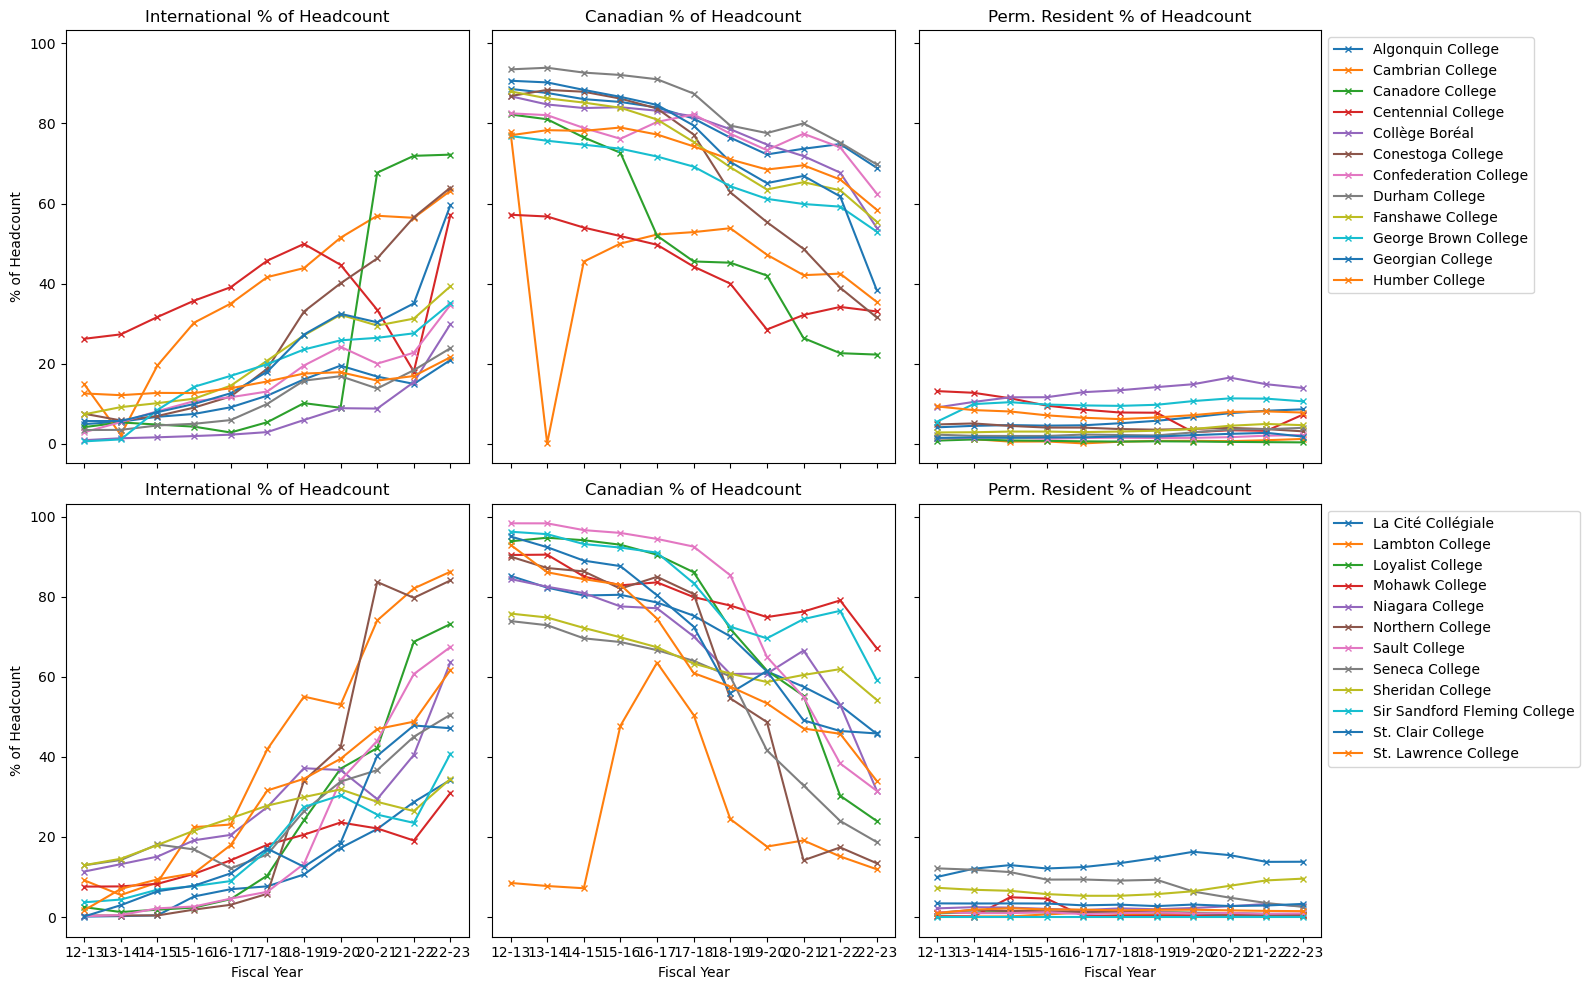

In [175]:
import matplotlib.pyplot as plt

# Get the unique colleges and split them into two halves
colleges = status_df['College Name'].unique()
half_index = len(colleges) // 2
colleges_first_half = colleges[:half_index]  # First half of colleges
colleges_second_half = colleges[half_index:]  # Second half of colleges

# Set up a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True)

# First row of plots: First half of colleges
# First plot: International % of Headcount
for college in colleges_first_half:
    college_data = status_df[status_df['College Name'] == college]
    axes[0, 0].plot(
        college_data['Fiscal Year'],
        college_data['International %'],
        label=college,
        marker='x',
        markersize=4
    )
axes[0, 0].set_title('International % of Headcount')
axes[0, 0].set_ylabel('% of Headcount')

# Second plot: Canadian % of Headcount
for college in colleges_first_half:
    college_data = status_df[status_df['College Name'] == college]
    axes[0, 1].plot(
        college_data['Fiscal Year'],
        college_data['Canadian %'],
        label=college,
        marker='x',
        markersize=4
    )
axes[0, 1].set_title('Canadian % of Headcount')

# Third plot: Perm. Resident % of Headcount with legend
for college in colleges_first_half:
    college_data = status_df[status_df['College Name'] == college]
    axes[0, 2].plot(
        college_data['Fiscal Year'],
        college_data['Perm. Resident %'],
        label=college,
        marker='x',
        markersize=4
    )
axes[0, 2].set_title('Perm. Resident % of Headcount')
axes[0, 2].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Just one legend for the first row

# Second row of plots: Second half of colleges
# Fourth plot: International % of Headcount
for college in colleges_second_half:
    college_data = status_df[status_df['College Name'] == college]
    axes[1, 0].plot(
        college_data['Fiscal Year'],
        college_data['International %'],
        label=college,
        marker='x',
        markersize=4
    )
axes[1, 0].set_title('International % of Headcount')
axes[1, 0].set_ylabel('% of Headcount')
axes[1, 0].set_xlabel('Fiscal Year')

# Fifth plot: Canadian % of Headcount
for college in colleges_second_half:
    college_data = status_df[status_df['College Name'] == college]
    axes[1, 1].plot(
        college_data['Fiscal Year'],
        college_data['Canadian %'],
        label=college,
        marker='x',
        markersize=4
    )
axes[1, 1].set_title('Canadian % of Headcount')
axes[1, 1].set_xlabel('Fiscal Year')

# Sixth plot: Perm. Resident % of Headcount with legend
for college in colleges_second_half:
    college_data = status_df[status_df['College Name'] == college]
    axes[1, 2].plot(
        college_data['Fiscal Year'],
        college_data['Perm. Resident %'],
        label=college,
        marker='x',
        markersize=4
    )
axes[1, 2].set_title('Perm. Resident % of Headcount')
axes[1, 2].set_xlabel('Fiscal Year')
axes[1, 2].legend(loc='upper left', bbox_to_anchor=(1, 1))  # Just one legend for the second row

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Thoughts on the above:
Some very peculiar spikes that make very little sense 

- e.g. Lambton in 12-13 to 14-15
    - **Solved:** It's hidden in Unknown %, see below, it resolves itself after a few years
- Also Cambrian in 13-14
    - **Solved**: in 13-14 there is a spike at Cambrian in Unknown (77%) and Other Visa goes from 0 in 12-13 to 9.3% in 13-14, as the international student trend picks up. This can be fixed.

In [177]:
# look at changes of Conestoga College and Lambton College from 2012 to 2022
status_df[status_df['College Name'] == 'Lambton College']

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Offshore %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
143,Lambton College,12-13,3485,3.13,8.52,9.18,0.0,0.00,0.14,0.000,79.02
144,Lambton College,13-14,3292,3.43,7.75,5.50,0.0,0.00,0.15,0.000,83.17
145,Lambton College,14-15,3116,3.31,7.19,8.63,0.0,0.00,0.16,0.000,80.71
146,Lambton College,15-16,3470,3.05,47.78,22.45,0.0,0.00,0.66,0.000,26.05
147,Lambton College,16-17,3392,4.54,63.53,23.11,0.0,0.00,1.12,0.000,7.69
148,Lambton College,17-18,4462,4.33,50.45,41.91,0.0,0.11,0.76,0.055,2.33
149,Lambton College,18-19,5410,2.57,24.47,55.06,0.0,0.09,0.46,0.000,17.34
150,Lambton College,19-20,5073,2.84,17.60,52.99,0.0,0.00,0.37,0.000,26.20
151,Lambton College,20-21,8323,1.75,19.13,74.08,0.0,0.00,0.48,0.030,4.49
152,Lambton College,21-22,10690,1.22,15.13,82.07,0.0,0.00,0.38,0.050,1.11


SyntaxError: incomplete input (3477860531.py, line 1)

In [173]:
status_df[status_df['College Name'] == 'Cambrian College']

,College Name,Fiscal Year,School's Total Headcount This Year,Aboriginal %,Canadian %,International %,Offshore %,Other visa %,Perm. Resident %,Refugee/Protected %,Unknown %
11,Cambrian College,12-13,4659,5.88,77.83,14.87,0.00,0.000,1.42,0.00,0.00
12,Cambrian College,13-14,5034,0.00,0.10,2.22,0.00,9.325,1.15,0.00,77.87
13,Cambrian College,14-15,5099,0.00,45.50,19.55,0.00,0.050,0.53,0.10,34.22
14,Cambrian College,15-16,5568,3.84,50.00,30.24,0.09,0.090,0.57,0.00,15.16
15,Cambrian College,16-17,5835,12.58,52.25,35.00,0.00,0.000,0.09,0.09,0.00
16,Cambrian College,17-18,6464,4.92,52.86,41.63,0.00,0.000,0.51,0.04,0.00
17,Cambrian College,18-19,6223,1.59,53.83,43.87,0.00,0.000,0.71,0.00,0.00
18,Cambrian College,19-20,6615,0.51,47.21,51.47,0.00,0.000,0.73,0.04,0.00
19,Cambrian College,20-21,7350,0.18,42.11,56.94,0.00,0.000,0.64,0.07,0.00
20,Cambrian College,21-22,7284,0.07,42.49,56.43,0.00,0.000,0.88,0.07,0.00


In [191]:
# see what the diploma figures are in raw numbers for Lambton college
print("Number of Certificate students at Lambton in 12-13 of a total 3483 is", + round(3484 * 0.2359, 0) )
print("Number of Diploma students at Lambton in 12-13 of a total 3484 is", + round(3484 * 0.7641,0) )
print("\n")
print("Number of Certificate students at Lambton in 17-18 of a total 4454 is", + round(4454 * 0.3590, 0) )
print("Number of Diploma students at Lambton in 17-18 of a total 4454 is", + round(4454 * 0.7641,0) )
print("\n")
print("Number of Certificate students at Lambton in 19-20 of a total 5073 is", + round(5073 * 0.3966, 0) )
print("Number of Diploma students at Lambton in 19-20 of a total 5073 is", + round(5073 * 0.5837,0) )
print("\n")
print("Number of Certificate students at Lambton in 20-21 of a total 8321 is", + round(8321 * 0.6871, 0) )
print("Number of Diploma students at Lambton in 20-21 of a total 8321 is", + round(8321 * 0.2995,0) )

Number of Certificate students at Lambton in 12-13 of a total 3483 is 822.0
Number of Diploma students at Lambton in 12-13 of a total 3484 is 2662.0


Number of Certificate students at Lambton in 17-18 of a total 4454 is 1599.0
Number of Diploma students at Lambton in 17-18 of a total 4454 is 3403.0


Number of Certificate students at Lambton in 19-20 of a total 5073 is 2012.0
Number of Diploma students at Lambton in 19-20 of a total 5073 is 2961.0


Number of Certificate students at Lambton in 20-21 of a total 8321 is 5717.0
Number of Diploma students at Lambton in 20-21 of a total 8321 is 2492.0


They have almost divested from Diplomas to focus exclusively on one year certificates, as the share in degree students has also gone from zero in 12-13, beginning the offering in 15-16, to barely two-thirds of a percentage point in 22-23

## Change in offering?

I want to note whether these institutions **offer** certain qualifications like degrees, as well as the change in enrolment to these programs.

**Next step: Look at the student numbers in each of those Credential types and track their changes Year-on-Year**

## Year-on-year change in enrolment?

In [ ]:
# What is the headcount for degree programs for each school in each year?
degrees.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].sum()

College Name          Fiscal Year
Algonquin College     2012-2013      381
                      2013-2014      437
                      2014-2015      507
                      2015-2016      548
                      2016-2017      612
                                    ... 
St. Lawrence College  2018-2019      855
                      2019-2020      829
                      2020-2021      818
                      2021-2022      825
                      2022-2023      755
Name: Headcount Full-Time Fall, Length: 210, dtype: int64